In [1]:
from TightBinding import *

# Helper functions

## Chern (v, model, idx_list, mesh_size, gap_tolerance)

This function gives you the (Total) Chern number of the model (either TB or MagneticTB)

Arguments

1. v or model

When you already computed the eigenfunctions, put it in v.

You should have been meshed the parallelogram-shaped Brillouin zone into N1 x N2 slices.
When there are total N atoms in your model, you should have N N-dimensional eigenvectors.
So, the shape of v should be N1 x N2 x N x N.

If model is given rather than v, the function computes v. The Brillouin zone is sliced into (mesh_size) x (mesh_size).

2. idx_list (optional)

This is an array of band indices that you want to get the chern number.
The element of idx_list can be a number($0\leq i <N$) or a tuple of numbers($(i,j)$ where $0\leq i < j \leq N$.). When it is a number $i$, you get the Chern number of $i$-th band. When it is a tuple $(i,j)$, you get a total chern number of bands $i,i+1,...,j-1$.

When idx_list is not given, model should be given as (Argument 1). In this case, when we compute v, we also compute eigenvalues. Then, we determine which bands intersect (crosses without a gap). When the minimum energy difference between two adjacent bands are less than $gap ~tolerance$, we assume that two bands intersect. Since Chern number can only be calculated for a band (or bands) that is (are) gapped from other ones, we generate idx_list based on the information about gaps. If every N bands were gapped, idx_list would be $[0,1,2,...,N-1]$. If band 1 and band 2 intersects, idx_list would be $[0,(1,3),3,4,...,N-1]$.

3. mesh_size (optional, default = 30)
4. gap_tolerance (optional, default=0.01)

In [2]:
Honeycomb.D

In [3]:
model = MagneticTB(Honeycomb, Phi='1/3')
C, idx_list, [N1, N2, c] = Chern(model = model)

Outputs are

1. C : Chern numbers corresponding to each elements in idx_list

2. idx_list

3. N1, N2 : mesh size in each direction of Brillouin Zone

4. c : len(idx_list) x N1 x N2 ndarray showing the flux (of Berry curvature) of small plaquette. $c[n,i,j]$ is the flux corresponding to idx_list[n] and $(i,j)$-th plaquette. ($0\leq i <N1, 0\leq j <N2$)

In [4]:
C

array([-1.,  2., -2.,  2., -1.])

In [5]:
idx_list

[0, 1, (2, 4), 4, 5]

In [6]:
N1, N2

(30, 30)

The flux density can be easily plotted. There are hot spots of the flux.

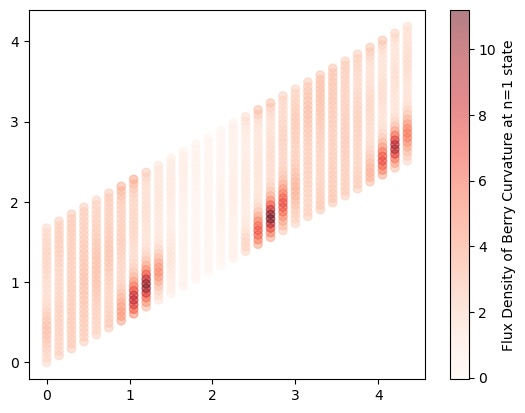

In [7]:
lat = model.lattice
band_num = 1
ix,iy = np.meshgrid(range(N1),range(N2))
x = lat[0,0]*(ix/N1)+lat[0,1]*(iy/N2)
y = lat[1,0]*(ix/N1)+lat[1,1]*(iy/N2)
plt.scatter(x,y,c=[t*N1*N2 for sublist in c[band_num] for t in sublist], cmap = plt.cm.Reds, alpha=0.5)
plt.colorbar(label='Flux Density of Berry Curvature at n='+str(band_num)+' state')

## plot_band(model, idx, mesh_num, save_dir)

This function plots the idx-th bands of your model.

Arguments

1. model
2. idx (optional, default= all bands)
   
idx can be a number($0\leq i <N$) or a tuple of numbers($(i,j)$ where $0\leq i < j \leq N$.) When it is a number $i$, you plot the $i$-th band. When it is a tuple $(i,j)$, you plot the bands $i,i+1,...,j-1$.

4. mesh_num (optional, default=100)

The Brillouin zone would be sliced to (mesh_num)x(mesh_num) plaquettes.

5. save_dir (optional)

Where to save the plot

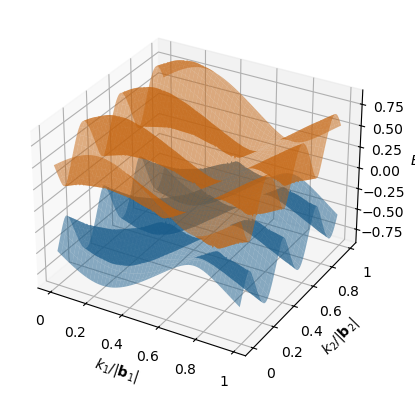

In [8]:
plot_band(model, (2,4))

This was why we should calculate Total Chern number rather than independent Chern numbers of band 2 and 3.

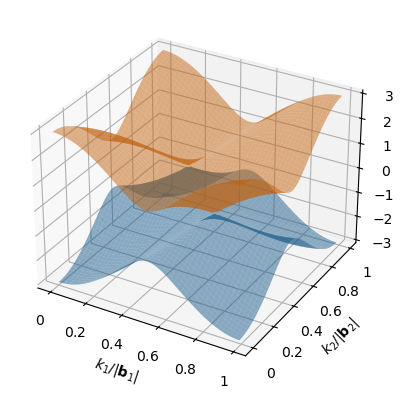

In [9]:
plot_band(Honeycomb)

## kE_plot(model, kroute, maxminute, save_dir)

This function plots the k-E plot that corresponding to the trajectory defined by kroute on the Brillouin zone.

1. model

Can be either the instance of the class TB or the class MagneticTB

2. kroute

kroute is a list. Each element is (indicator, position).

indicator is a string that indicates the point in Brillouin zone, such as $K, \Gamma, M$. This would be shown in the x-axis of the plot as ticks.

position is the list [kx,ky] that is showing the position in the Brillouin zone. You should note that [kx,ky] is not the vector "k" itself, but the index of "k" represented with primitive vectors of the reciprocal space.

3. maxminute (optional, default=1)

Maximum time (in minutes) that you can wait for a plot. If the time passes, only part of the plot would be shown.

4. save_dir (optional)

Where to save the figure

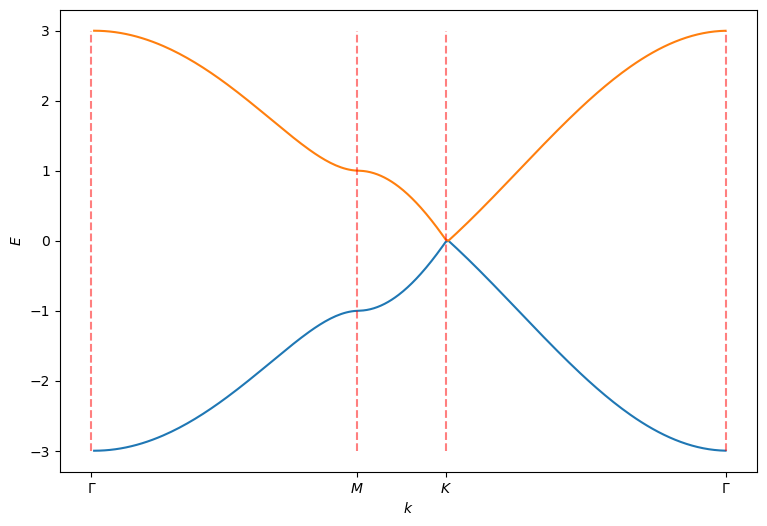

In [10]:
Gamma = ['$\Gamma$', [0,0]]
K = ['$K$', [2/3,1/3]]
M = ['$M$', [1/2,1/2]]
kroute = [Gamma, M, K, Gamma]
kE_plot(Honeycomb, kroute)

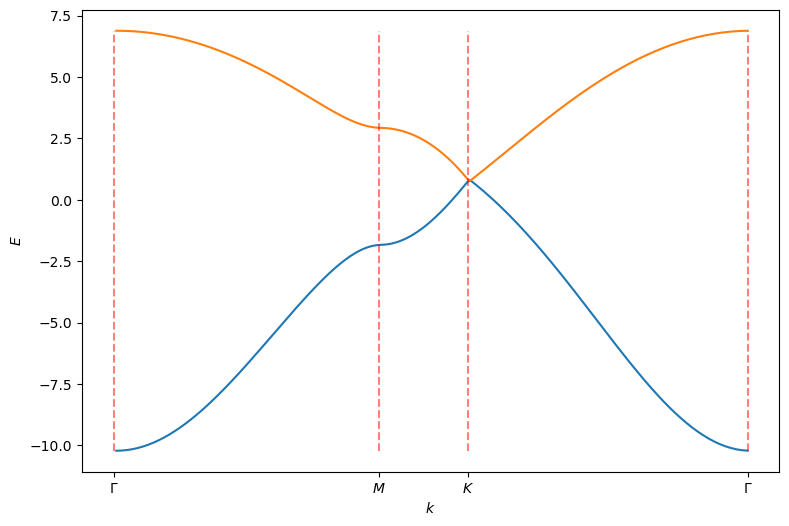

In [11]:
kE_plot(Graphene, kroute)

You can clearly see the Dirac cone at the $K$ point.

## Hofstadter_plot (TBmodel, q_max, k, N, max_minute, save_dir)

This function plots the Hofstadter's butterfly plot.

Arguments

1. TBmodel

Should be instance of the class TB

2. q_max

Maximum denominator q of $\Phi$ that you want to draw

4. k (optional, default=[0,0] = '$\Gamma$' point)

k for Hamiltonian(k). 

5. N (optional)

The periodicity of $\Phi$ (magnetic flux in one magnetic unit cell) in Hofstadter's butterfly plot is not always 1. This is because hopping trajectories are finer than Magnetic Unit Cell size. Periodicity is a divisor of 2*(denominator of $\det D$).

When N is given, we plot with $\Phi$ ranging from 0 to N.

When N is not given, we compute $\det D$ if possible and set N to be the maximum possible value. If D is not computed and we can't compute D now since the model is non-symbolic, we set N=1.

6. maxminute (optional, default=1)

Maximum time (in minutes) that you can wait for a plot. If the time passes, only part of the plot would be shown.

7. save_dir (optional)

Where to save the figure

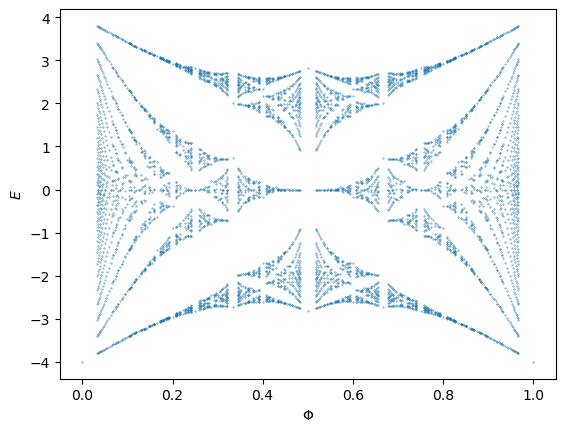

In [12]:
Hofstadter_plot(Square, 30, N=1)

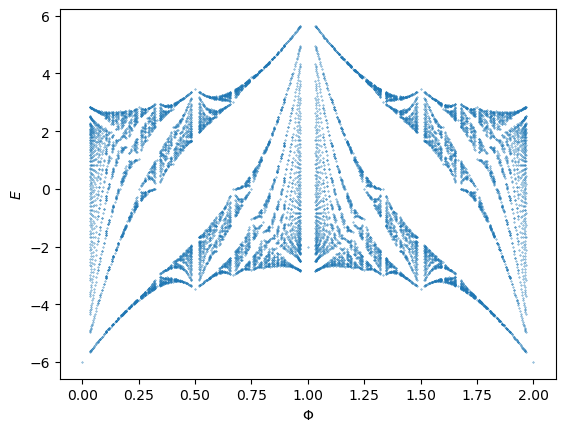

In [13]:
Hofstadter_plot(Triangle,30)

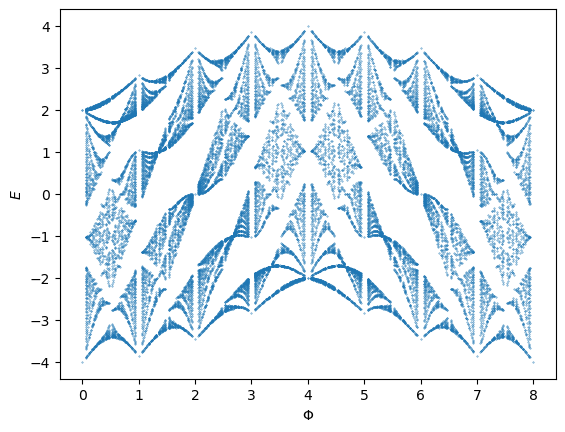

In [14]:
Hofstadter_plot(Kagome, 30)

Apparently, it seems that the periodicity of the Hofstadter plot of the Honeycomb lattice is 1, but when you look at Energy values at $\Phi=0,1,2,3,4,5$, you can see that they are not identical.

Hence, when you plot all eigenvalues of the Brillouin zone, the periodicity would be 1, but if you set $k$ to a specific point, the periodicity would be 6.

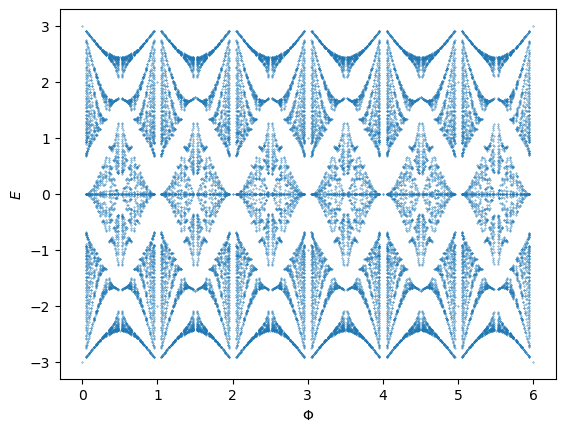

In [15]:
Hofstadter_plot(Honeycomb,30)

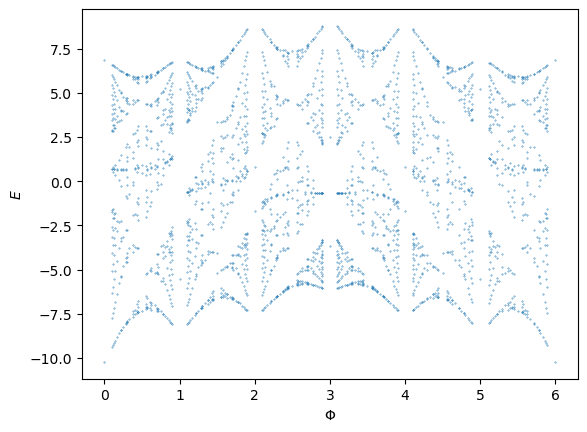

In [16]:
Hofstadter_plot(Graphene,30)